In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats
import statsmodels.api as sm

!pip install plotly==4.14.3
import plotly.graph_objects as go
import plotly.express as px

In [51]:
!pip install scipy

Датасет представляет собой данные 1000 клиентов, которые намереваются купить автомобиль, с учетом их годовой заработной платы.

столбцы:
User ID -ID пользователя;
Gender - Пол;
Age - Возраст;
Annual Salary - годовой оклад;
Purchased - Решение о покупке (Нет = 0; Да = 1).

# Подготовка и редактирование датасета

In [52]:
cars = pd.read_csv('/Users/evgeniyazabluda/Downloads/car_data.csv')

In [53]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [54]:
cars.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

Датасет не имеет нулевых значений. Содержит числовые и категориальные значения.
Наша целевая переменная - «Purchased». 

In [55]:
cars.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


# Корреляция, базовая визуализация, меры тенденций и разброса

In [56]:
cars

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


<AxesSubplot:>

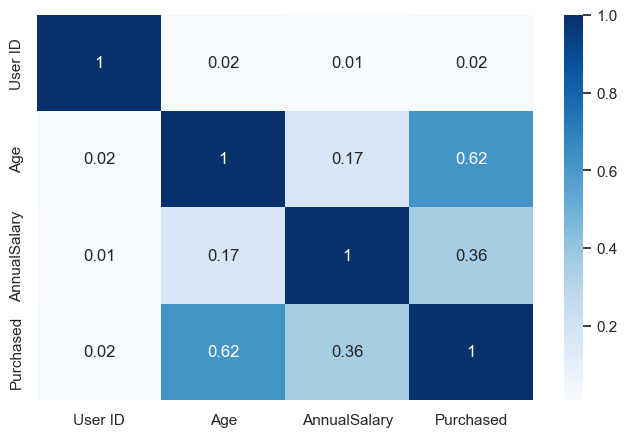

In [57]:
# Проверим, есть ли корреляция между переменными

correlation = cars.corr().round(2)
plt.figure(figsize = (8,5))
sns.heatmap(correlation, annot = True, cmap = 'Blues')

Согласно тепловой карте, между нашими переменными нет сильной корреляции. Но переменная Age имеет среднюю степень взаимосвязи с нашей целевой переменной.

<AxesSubplot:xlabel='Purchased', ylabel='count'>

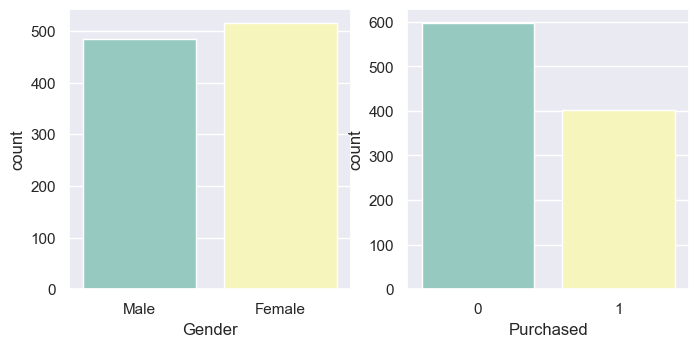

In [109]:
plt.figure(figsize = (8,8))

plt.subplot(2,2,1)
sns.countplot(x = 'Gender', palette='Set3', data = cars)

plt.subplot(2,2,2)
sns.countplot(x = 'Purchased', palette='Set3', data = cars)

In [59]:
# Gender: в нашем датасете больше женщин, чем мужчин.

cars['Gender'].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

In [60]:
# Purchased: у нас больше людей, которые не купили машину

cars['Purchased'].mode()

0    0
Name: Purchased, dtype: int64

/Users/evgeniyazabluda/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AnnualSalary'>

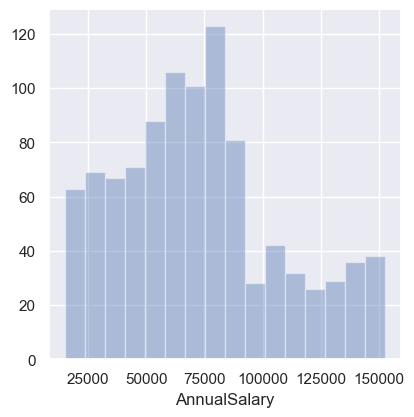

In [107]:
plt.figure(figsize = (10,10))

sns.set(color_codes = True)

plt.subplot(2,2,2)
sns.distplot(cars.AnnualSalary, kde = False)

AnnualSalary: наибольшее количество людей в датасете имеет среднюю ЗП около 80k. Чем выше зарплата, тем меньше людей, имеющих ее.

/Users/evgeniyazabluda/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

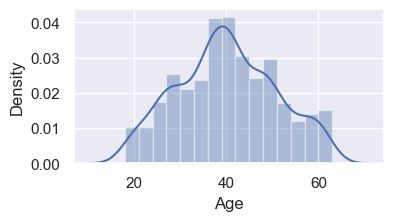

In [106]:
plt.figure(figsize = (4,2))

sns.distplot(cars['Age'])

Age: у нас есть люди всех возрастов, но больше всего в возрасте 38-42 года.

<AxesSubplot:xlabel='Purchased', ylabel='count'>

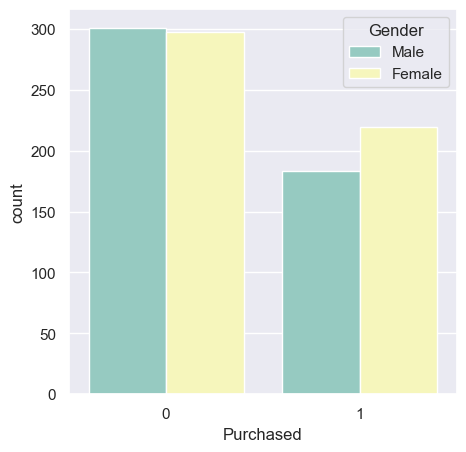

In [63]:
plt.figure(figsize = (5,5))

sns.countplot(x = 'Purchased', hue= 'Gender', palette='Set3', data = cars)

Когда мы сравниваем нашу целевую переменную Purchased с другими категориальными переменными, можно обнаружить следующее:
женщины немного чаще покупают автомобили, чем мужчины.

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

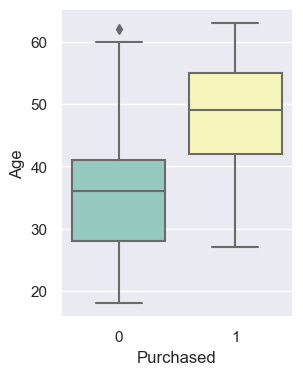

In [101]:
plt.figure(figsize = (3,))

sns.boxplot(x = 'Purchased', y = 'Age', palette = "Set3", data = cars)

Выбросов в переменной по возрасту при целевой переменной "Purchased" практически нет.

<Figure size 500x500 with 0 Axes>

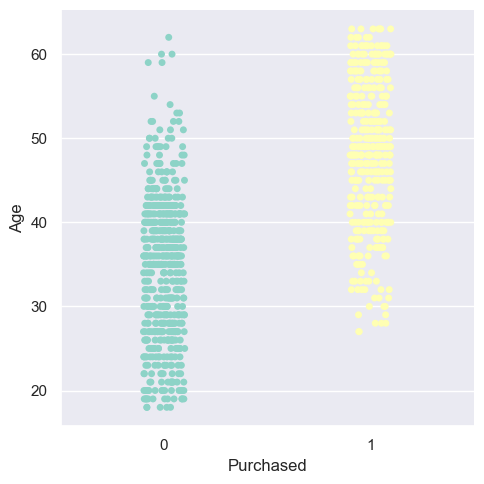

In [65]:
plt.figure(figsize = (5,5))
sns.catplot(x = "Purchased", y = "Age", palette = "Set3", data = cars)

<Figure size 500x500 with 0 Axes>

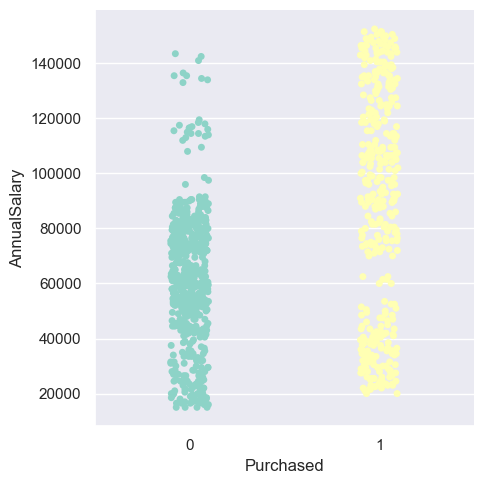

In [66]:
plt.figure(figsize = (5,5))
sns.catplot(x = "Purchased", y = "AnnualSalary", palette = "Set3", data = cars)

Если посмотреть на переменную Age, мы видим, что пожилые люди с большей вероятностью покупают машину, чем очень молодые.

По переменной Annual salary, мы можем сделать вывод, что люди с самой высокой зарплатой чаще покупают машины. Но люди с низкими доходами также совершают покупку авто.

<Figure size 500x500 with 0 Axes>

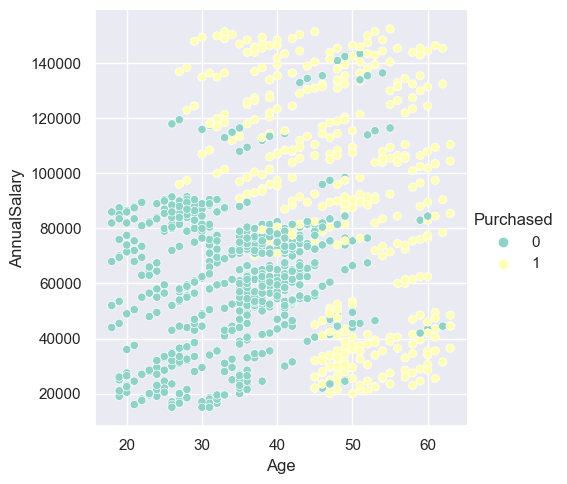

In [67]:
plt.figure(figsize = (5,5))
sns.relplot(x='Age', y = 'AnnualSalary', hue = "Purchased",palette = "Set3", data = cars)

Можно сделать вывод, что чем старше человек и чем больше он зарабатывает в год, тем больше вероятность того, что он купит машину.

In [68]:
# Вычисляем среднеквадратичный размах, смотрим количество выбросов по датасету по переменной AnnualSalary, определяющей 
# уровень заработка.

iqr = np.percentile(cars['AnnualSalary'], 75) - np.percentile(cars['AnnualSalary'], 25)

iqr_threshold_bottom = np.percentile(cars['AnnualSalary'], 25) - 1.5 * iqr
iqr_threshold_top = np.percentile(cars['AnnualSalary'], 75) + 1.5 * iqr
print(iqr_threshold_bottom, iqr_threshold_top)

cars[cars['AnnualSalary'] > iqr_threshold_top].shape

-19062.5 155437.5


(0, 5)

Выбросов нет!

In [69]:
# Переходим к вычислению дисперсии и среднеквадратичного отклонения.

mean_tend = cars['AnnualSalary'].mean()
mean_tend_deviation = cars['AnnualSalary'] - mean_tend
mean_tend_deviation_square = mean_tend_deviation ** 2

In [70]:
variance_general = mean_tend_deviation_square.sum() / len(cars) - 1

square_variance = np.sqrt(variance_general)

print('Дисперсия:', variance_general), 
print(''),
print('Среднеквадратичное отклонение', square_variance)

Дисперсия: 1188256278.0

Среднеквадратичное отклонение 34471.093368212154


# Z-оценка

In [71]:
# Вычисляем минимальный и максимальный возраст покупателей машин.

print(cars['Age'].min())
print(cars['Age'].max())

18
63


In [72]:
# Функция ниже - для создания категорий возрастов, которые потом будут использованы для вычисления z-оценки.

def age_fragment(age):
    if age < 20:
        return 'До 20'
    elif age in range(20, 30):
        return '20-29'
    elif age in range(30, 40):
        return '30-39'
    elif age in range(40, 50):
        return '40-49'
    elif age in range(50, 60):
        return '50-59'
    else:
        return '60+'

In [73]:
cars['Age_categories'] = cars['Age'].apply(age_fragment)
cars

,User ID,Gender,Age,AnnualSalary,Purchased,Age_categories
0,385,Male,35,20000,0,30-39
1,681,Male,40,43500,0,40-49
2,353,Male,49,74000,0,40-49
3,895,Male,40,107500,1,40-49
4,661,Male,25,79000,0,20-29
...,...,...,...,...,...,...
995,863,Male,38,59000,0,30-39
996,800,Female,47,23500,0,40-49
997,407,Female,28,138500,1,20-29
998,299,Female,48,134000,1,40-49


In [74]:
# Проверка - всё правильно сгруппировалось.

cars.groupby('Age_categories')['Age'].value_counts()

Age_categories  Age
20-29           27     29
                28     25
                26     22
                29     22
                24     15
                25     15
                20     14
                21     11
                23     11
                22      9
30-39           38     48
                36     44
                35     38
                39     37
                37     32
                31     22
                30     21
                32     20
                33     18
                34     15
40-49           40     46
                42     44
                41     42
                49     33
                48     32
                43     30
                47     28
                45     23
                46     22
                44     17
50-59           50     24
                51     19
                52     17
                59     16
                53     15
                58     14
                55     13
                54

In [75]:
# Создаём новый датафрейм специально под z-оценку.

cars_z = cars[['User ID', 'Age_categories', 'AnnualSalary']]

In [76]:
# Для каждой возрастной категории создаём свой датафрейм. Это нужно для того, чтобы сделать z-оценку независимой для 
# покупателей всех возрастов.

Age_bef20 = cars_z[cars_z['Age_categories'] == 'До 20'].reset_index()
Age_bef30 = cars_z[cars_z['Age_categories'] == '20-29'].reset_index()
Age_bef40 = cars_z[cars_z['Age_categories'] == '30-39'].reset_index()
Age_bef50 = cars_z[cars_z['Age_categories'] == '40-49'].reset_index()
Age_bef60 = cars_z[cars_z['Age_categories'] == '50-59'].reset_index()
Age_af60 = cars_z[cars_z['Age_categories'] == '60+'].reset_index()

In [77]:
# Применяем z-оценку на основании зарплаты покупателей к каждой переменной.

Age_bef20['z_score'] = scipy.stats.zscore(Age_bef20['AnnualSalary']) 
Age_bef30['z_score'] = scipy.stats.zscore(Age_bef30['AnnualSalary']) 
Age_bef40['z_score'] = scipy.stats.zscore(Age_bef40['AnnualSalary']) 
Age_bef50['z_score'] = scipy.stats.zscore(Age_bef50['AnnualSalary']) 
Age_bef60['z_score'] = scipy.stats.zscore(Age_bef60['AnnualSalary']) 
Age_af60['z_score'] = scipy.stats.zscore(Age_af60['AnnualSalary']) 

In [78]:
# Совмещаем все датасеты в один.

cars_zscore = pd.concat([Age_bef20, Age_bef30, Age_bef40, Age_bef50, Age_bef60, Age_af60])

In [79]:
# Избавляемся от лишнего столбика индекса, получившегося при конкатинации.

cars_zscore = cars_zscore.drop(columns = ['index'], axis = 1)

In [80]:
cars_zscore.groupby('Age_categories')['z_score'].mean()

Age_categories
20-29    4.620581e-17
30-39   -4.309171e-17
40-49   -7.753174e-17
50-59   -5.659961e-17
60+      1.862708e-16
До 20   -1.044916e-16
Name: z_score, dtype: float64

Полученные данные в целом гомогенны, можно выделить только показатели возрастной группы 40-49 и 50-59, которые показывают значения наибольшего падения ЗП ниже среднего. 

In [81]:
cars_zscore[cars_zscore['z_score'] < -3]

,User ID,Age_categories,AnnualSalary,z_score


Превышения на три стандартных отклонения значений z-оценки по ЗП во всем датасете нет.

# Хи-квадрат и T-test

In [82]:
# Создаем новый датасет с переменными "Gender" и бинарной "Purchased"

ct_o = cars.groupby('Gender')['Purchased'].value_counts().unstack()
ct_o

Purchased,0,1
Gender,,
Female,297,219
Male,301,183


In [83]:
# Функция показала степени свободы = 1 и критерий, равный 2.2289.

scipy.stats.chi2_contingency(ct_o, correction = False)

(2.228918862773215,
 0.1354485957134652,
 1,
 array([[308.568, 207.432],
        [289.432, 194.568]]))

In [84]:
alpha = 0.05

critical_value = 6.6

Если даже рассматривать альфу как равную 0,05, выходит, что зависимости между категориями переменной нет, и что необходимо принять нулевую гипотезу о том, что связи между полом и количеством совершаемых покупок нет.

In [85]:
cars_t_purchased = cars[cars['Gender'] == "Male"]['Age']
cars_t__not_purchased = cars[cars['Gender'] != "Male"]['Age']

<AxesSubplot:>

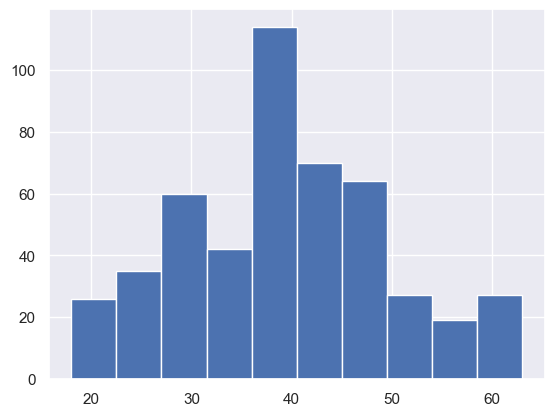

In [86]:
cars_t_purchased.hist()

<AxesSubplot:>

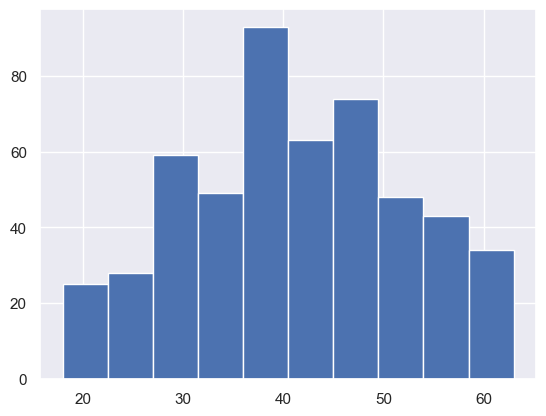

In [87]:
cars_t__not_purchased.hist()

In [88]:
n_1 = len(cars_t_purchased)
n_2 = len(cars_t__not_purchased)

var_1 = cars_t_purchased.var()
var_2 = cars_t__not_purchased.var()

v_1 = var_1 / n_1
v_2 = var_2 / n_2

# Вычисляем степени свободы по Уэлшу
dof_w = (v_1 + v_2)**2 / (v_1**2 / (n_1 - 1) + v_2**2 / (n_2 - 1))
dof_w = int(dof_w)
print(dof_w)

997


In [89]:
# По таблице критических значений t-критерия Стьюдента, крит. значение равняется 2.5816 при 997 степенях свободы и alpha = 0.01

t_critical = 2.5816 

def t_check(t, t_crit):
    if abs(t) > t_crit:
        print('Отвергаем H0.')
    else:
        print('Не отвергаем H0.')

In [90]:
s_m1_m2 = np.sqrt(v_1 + v_2)
s_m1_m2

mean_1 = cars_t_purchased.mean()
mean_2 = cars_t__not_purchased.mean()

t = (mean_1 - mean_2) / s_m1_m2

t_check(t, t_critical)

Отвергаем H0.


В данном случае полученное значение больше критического значений t-критерия, и, следовательно, разница между средними переменных "Gender" и "Age" статистически значима.

# Линейная регрессия

In [91]:
# Находим среднее и медианные значения

print(cars['AnnualSalary'].mean())
print(cars['AnnualSalary'].median())

72689.0
72000.0


In [92]:
# Перекодируем данные о ЗП в бинарную систему.

def salary_binary(salary):
    if salary >= 72000:
        return 1
    else:
        return 0
    
cars['AnnualSalary_bin'] = cars['AnnualSalary'].apply(salary_binary)
cars

,User ID,Gender,Age,AnnualSalary,Purchased,Age_categories,AnnualSalary_bin
0,385,Male,35,20000,0,30-39,0
1,681,Male,40,43500,0,40-49,0
2,353,Male,49,74000,0,40-49,1
3,895,Male,40,107500,1,40-49,1
4,661,Male,25,79000,0,20-29,1
...,...,...,...,...,...,...,...
995,863,Male,38,59000,0,30-39,0
996,800,Female,47,23500,0,40-49,0
997,407,Female,28,138500,1,20-29,1
998,299,Female,48,134000,1,40-49,1


In [93]:
# Перекодируем данные о поле в бинарную систему при помощи цифр, а не строчных переменных.

def gender(binary):
    if binary == 'Male':
        return 1
    else:
        return 0
    
cars['Gender_bin'] = cars['Gender'].apply(gender)

<AxesSubplot:>

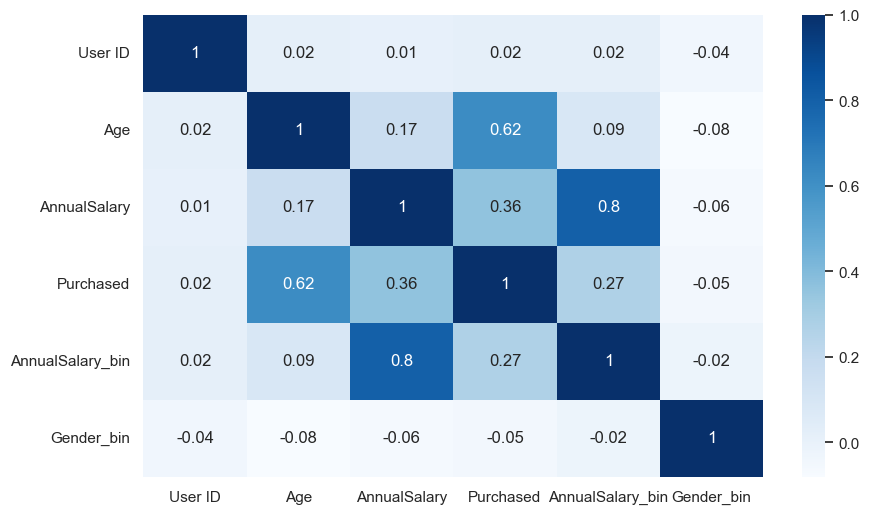

In [94]:
correlation = cars.corr().round(2)
plt.figure(figsize = (10,6))
sns.heatmap(correlation, annot = True, cmap = 'Blues')

Наивысшей корреляцией обладают Age и Purchased; переменные AnnualSalary и AnnualSalary_bin не рассматриваем в связи с тем, что это, по сути, одни и те же переменные.

In [95]:
X = cars['Purchased']
y = cars['AnnualSalary']

res = scipy.stats.linregress(X, y)
print(res)

r_sq = res.rvalue ** 2
print(r_sq)

# Модель объяснения между переменными Purchased и AnnualSalary слабая, объясняет дисперсию целевой переменной всего на 13%.

LinregressResult(slope=25659.836270154257, intercept=62373.745819397984, rvalue=0.36497443128283447, pvalue=7.197313984955202e-33, stderr=2071.972723964558, intercept_stderr=1313.7026031332016)
0.13320633549022845


In [96]:
X = cars['Purchased']
y = cars['Age']

res = scipy.stats.linregress(X, y)
print(res)

r_sq = res.rvalue ** 2
print(r_sq)

# Модель между Purchased и Age заметно сильнее, объясняет объясняет дисперсию целевой переменной на 38%.

LinregressResult(slope=13.446097272833157, intercept=34.70066889632107, rvalue=0.6160363973749039, pvalue=1.5481361726352194e-105, stderr=0.5442459471156434, intercept_stderr=0.3450708154605734)
0.3795008428906505


# Теперь давайте выдвинем гипотезы для проверки взаимосвязи между данными:

H0: при увеличении возраста потребителей отсутствует увеличение шанса приобретения ими автомобиля.\
H1: при увеличении возраста потребителей происходит увеличение шанса приобретения ими автомобиля

In [97]:
# Строим линейную регрессию.

X_simple = sm.add_constant(cars['Age'])
y = cars['Purchased']

mod = sm.OLS(y, X_simple)
res_simple = mod.fit()
print(res_simple.summary())

                            OLS Regression Results                            
Dep. Variable:              Purchased   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     610.4
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.55e-105
Time:                        14:17:09   Log-Likelihood:                -467.59
No. Observations:                1000   AIC:                             939.2
Df Residuals:                     998   BIC:                             949.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7299      0.047    -15.393      0.0

Переменная статистически значима. Принимаем H1; можно утверждать, что с увеличением возраста также увеличивается шанс того, что потребитель купит машину. 

# Логистическая регрессия

Аналогичным образом, представим гипотезы для проверки данных при помощи логистической регресиии.

H0: с ростом показателя возраста у людей не увеличивается шанс покупки ими автомобиля.\
H1: с ростом показателя возраста у людей не увеличивается шанс приобретения ими автомобиля.

In [98]:
# Аналогично построим по данным теременным логистичекую регрессию, выявив, как будет увеличиваться с возрастом шанс того, что
# человек купит машину.

x = sm.add_constant(cars['Age'])
y = cars['Purchased']

logit = sm.Logit(y, x)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.443184
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.3423
Time:                        14:17:10   Log-Likelihood:                -443.18
converged:                       True   LL-Null:                       -673.81
Covariance Type:            nonrobust   LLR p-value:                2.557e-102
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9665      0.500    -15.923      0.000      -8.947      -6.986
Age            0.1827      0.

In [99]:
np.exp(-7.9665)

0.0003468909821008502

In [100]:
np.exp(0.1827)

1.2004542177896518

На основании полученных данных можно сделать вывод, что мы отвергаем H0. Шанс того, что с уменьшением возраста респондента будет оформлена покупка автомобиля, незначительно мал, и, напротив, чем выше возраст человека, тем вероятнее он купит автомобиль.

# Выводы по работе

Исходя из полученных данных, покупка автомобиля рассматривается представителями групп людей как с более низкими доходами, так и с более высокими. Важной переменной, оказывающей влияние на динамику спроса на авто, является возраст потребителей - чем старше человек, тем вероятнее он купит машину. 